In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
#Load the dataset
wine=datasets.load_wine()
X=wine.data
y=wine.target

In [3]:
#Standardize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [4]:
#Apply k-means clustering
n_cluster=3
kmeans=KMeans(n_clusters=n_cluster,random_state=42)
cluster_labels=kmeans.fit_predict(X_scaled)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
#Use PCA for visualization
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

Text(0, 0.5, 'Second Principal Component')

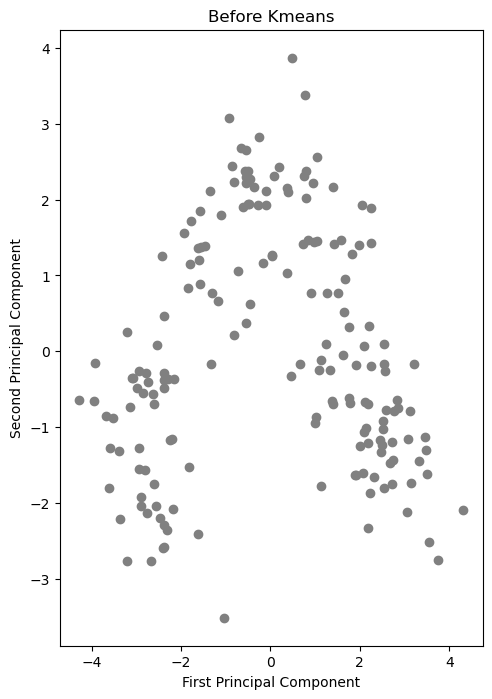

In [6]:
#Visualize the result
plt.figure(figsize=(12,8))

#Before k-means
plt.subplot(121)
plt.scatter(X_pca[:,0],X_pca[:,1],c="gray")
plt.title("Before Kmeans")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

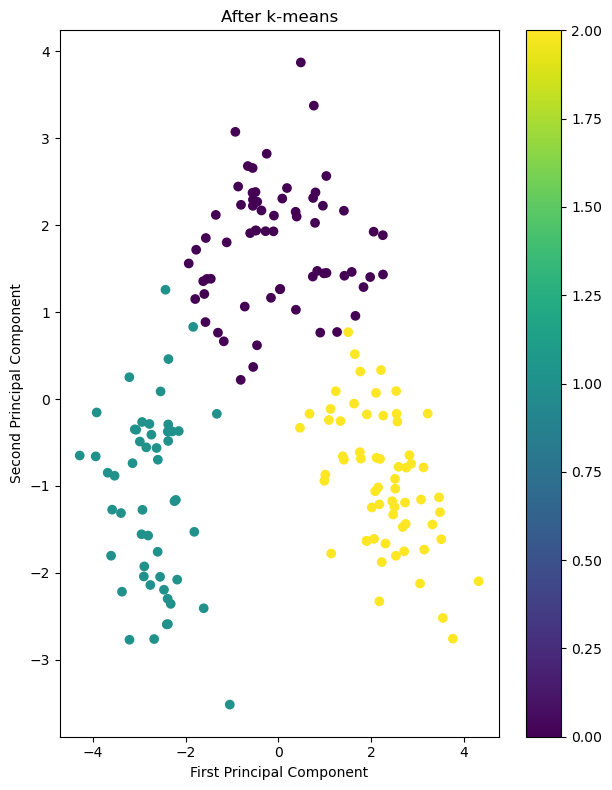

In [7]:
#Visualize the result
plt.figure(figsize=(12,8))

#After k-means
plt.subplot(122)
scatter=plt.scatter(X_pca[:,0],X_pca[:,1],c=cluster_labels,cmap="viridis")
plt.title("After k-means")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

plt.colorbar(scatter)
plt.tight_layout()
plt.show()

In [8]:
#Evaluate the clustering
print(f"Silhouette Score: {silhouette_score(X_scaled,cluster_labels):.2f}")

Silhouette Score: 0.28


In [9]:
#Analyze cluster characteristics
for i in range(n_cluster):
    cluster=X[cluster_labels == i]
    print(f"\nCluster {i} characteristics:")
    for j, feature in enumerate(wine.feature_names):
        print(f"{feature}: {cluster[:, j].mean():.2f}")


Cluster 0 characteristics:
alcohol: 12.25
malic_acid: 1.90
ash: 2.23
alcalinity_of_ash: 20.06
magnesium: 92.74
total_phenols: 2.25
flavanoids: 2.05
nonflavanoid_phenols: 0.36
proanthocyanins: 1.62
color_intensity: 2.97
hue: 1.06
od280/od315_of_diluted_wines: 2.80
proline: 510.17

Cluster 1 characteristics:
alcohol: 13.13
malic_acid: 3.31
ash: 2.42
alcalinity_of_ash: 21.24
magnesium: 98.67
total_phenols: 1.68
flavanoids: 0.82
nonflavanoid_phenols: 0.45
proanthocyanins: 1.15
color_intensity: 7.23
hue: 0.69
od280/od315_of_diluted_wines: 1.70
proline: 619.06

Cluster 2 characteristics:
alcohol: 13.68
malic_acid: 2.00
ash: 2.47
alcalinity_of_ash: 17.46
magnesium: 107.97
total_phenols: 2.85
flavanoids: 3.00
nonflavanoid_phenols: 0.29
proanthocyanins: 1.92
color_intensity: 5.45
hue: 1.07
od280/od315_of_diluted_wines: 3.16
proline: 1100.23
